In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime
# быстрый разведочный анализ
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from math import log as log

In [7]:
RANDOM_SEED = 11

# Данные

In [8]:
# путь к файлам
path = 'data'

In [9]:
train = pd.read_csv(path +'/train.csv')
test = pd.read_csv(path +'/test.csv')
sample = pd.read_csv(path +'/sample_submission.csv')

### Рассмотрим данные

In [10]:
print(train.info())
print('Train size: ', train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [11]:
print(test.info())
print('Test size: ', test.shape)
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [12]:
print(sample.info())
print(sample.shape)
sample.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB
None
(24354, 2)


,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


/Users/rus/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


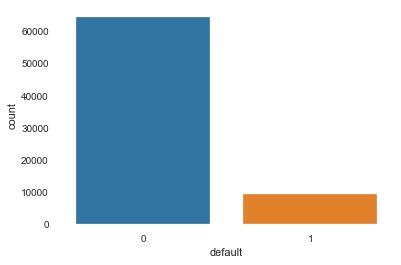

In [13]:
# распределение целевого признака
plot = sns.countplot(train['default'])

### Объединим train и test

In [14]:
train['sample'] = 1
test['sample'] = 0
test['default'] = -1  # временное значение ???
data = train.append(test, sort=False).reset_index(drop=True)

In [15]:
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

(110148, 20)

<h2>Описания полей</h2>
<ul>
<li><p><code>client_id</code> - идентификатор клиента</p></li>
<li><p><code>education</code> - уровень образования</p></li>
<li><p><code>sex</code> - пол заемщика</p></li>
<li><p><code>age</code> - возраст заемщика</p></li>
<li><p><code>car</code> - флаг наличия автомобиля</p></li>
<li><p><code>car_type</code> - флаг автомобиля иномарки</p></li>
<li><p><code>decline_app_cnt</code> - количество отказанных прошлых заявок</p></li>
<li><p><code>good_work</code> - флаг наличия “хорошей” работы</p></li>
<li><p><code>bki_request_cnt</code> - количество запросов в БКИ</p></li>
<li><p><code>home_address</code> - категоризатор домашнего адреса</p></li>
<li><p><code>work_address</code> -  категоризатор рабочего адреса</p></li>
<li><p><code>income</code> - доход заемщика</p></li>
<li><p><code>foreign_passport</code> - наличие загранпаспорта</p></li>
<li><p><code>sna</code> - связь заемщика с клиентами банка</p></li>
<li><p><code>first_time</code> - давность наличия информации о заемщике</p></li>
<li><p><code>score_bki</code> - скоринговый балл по данным из БКИ</p></li>
<li><p><code>region_rating</code> - рейтинг региона</p></li>
<li><p><code>app_date</code> - дата подачи заявки</p></li>
<li><p><code>default</code> - флаг дефолта по кредиту </p></li>
</ul></div>

In [16]:
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,sample
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,1


# Разведочный анализ (EDA)

In [17]:
# разделяю по типам признаков для предобработки
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','region_rating'] 
cat_cols = ['education','work_address','home_address','sna','first_time'] 
bin_cols = ['sex','car','car_type','good_work','foreign_passport'] 

## Числовые признаки

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


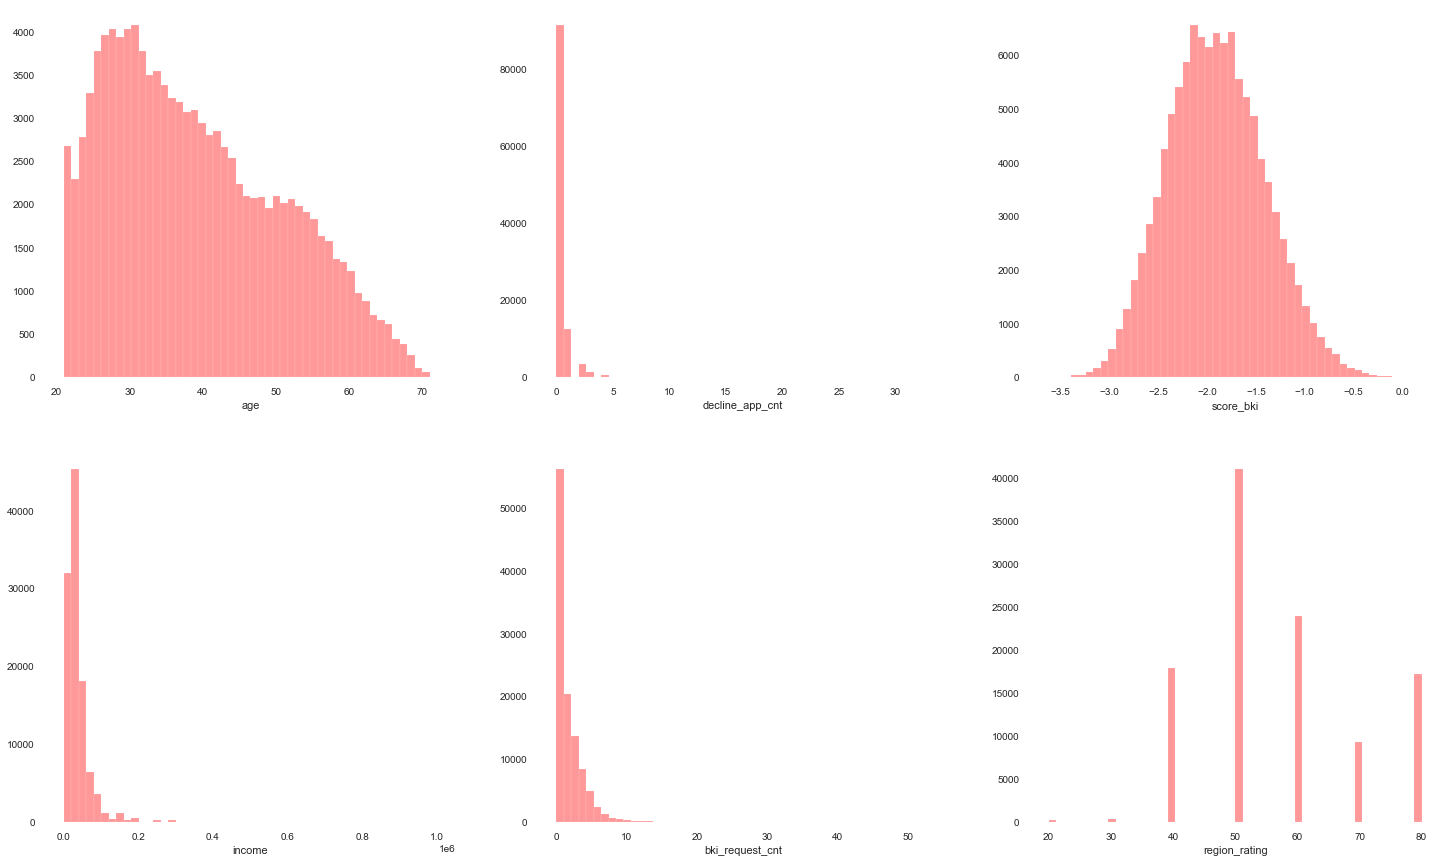

In [18]:
# рассмотрим числовые значения
fig, axes = plt.subplots(2, 3, figsize=(25,15))

for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i], color="r")

- чаще заемщиками являются клиенты 25-35
- большинство не имеет отказных заявок, но есть небольшое число клиентов с высоким количеством отказов, отказы смещены влево

Опреджелить характеристику клиентов с высокой отказностью

- оценка bki распределена нормально
- доход смещен влево, есть выбросы с крайне высоким уровнем дохода

Есть ли те, кто не имеет "хорошую" работу, но имеет доход выше среднего?

- половина клиентов имеет 0 или 1 запрос в БКИ, данные смещены влево
- крайне мало клиентов из регионов с рейтиного 30 и ниже

### Логорифмируем смещенные признаки для нормального распределения

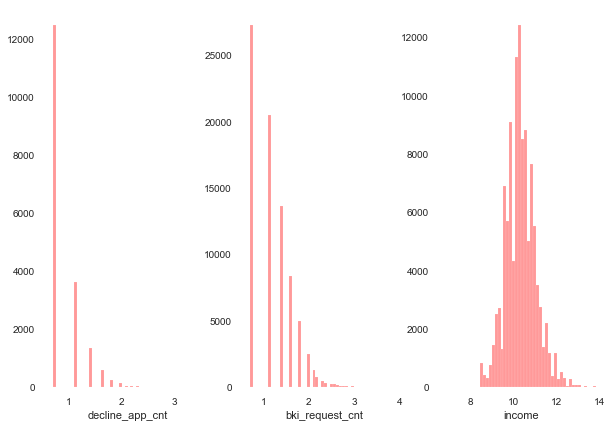

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10,7))
for i,col in enumerate(['decline_app_cnt', 'bki_request_cnt', 'income']):
    data[col] = np.log(data[col] + 1)
    sns.distplot(data[col][data[col] > 0].dropna(), ax=axes.flat[i],kde = False, rug=False,color="r")    

### Построим боксплоты для числовых признаков

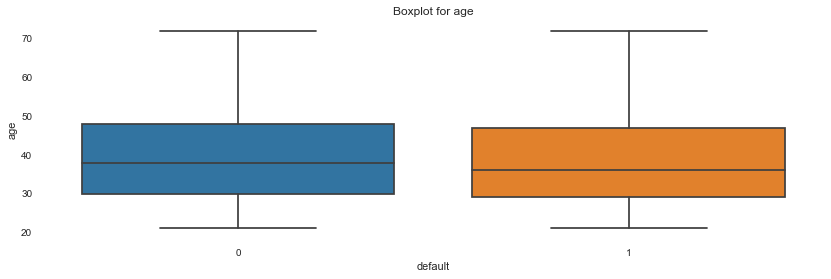

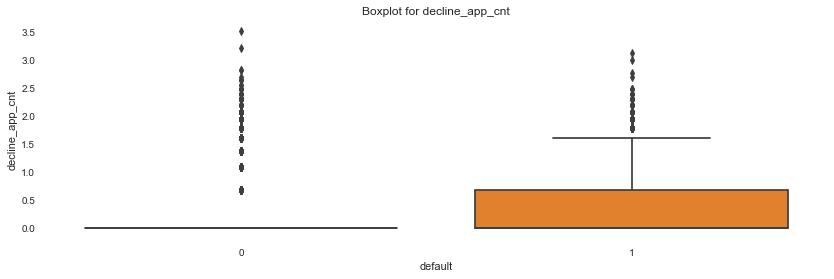

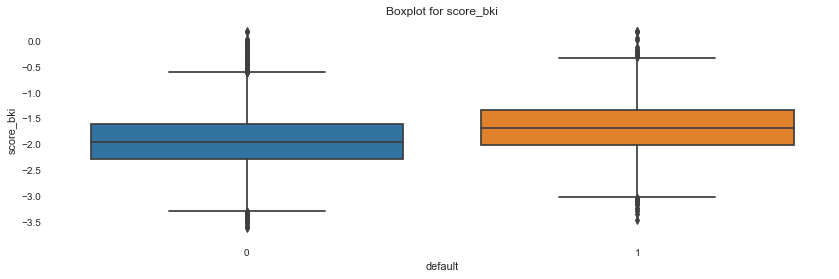

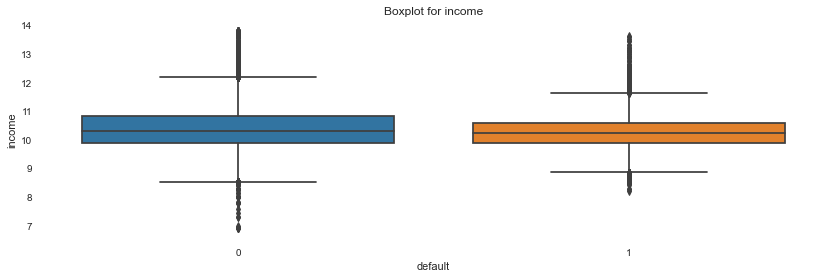

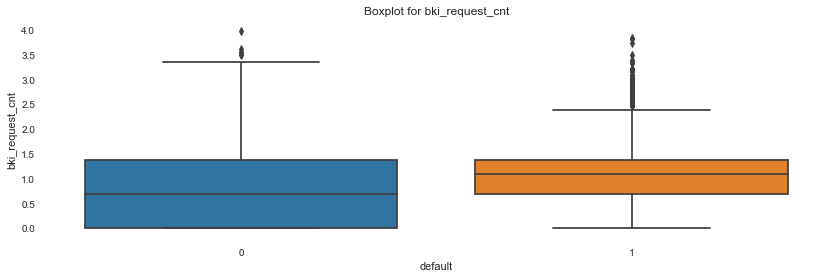

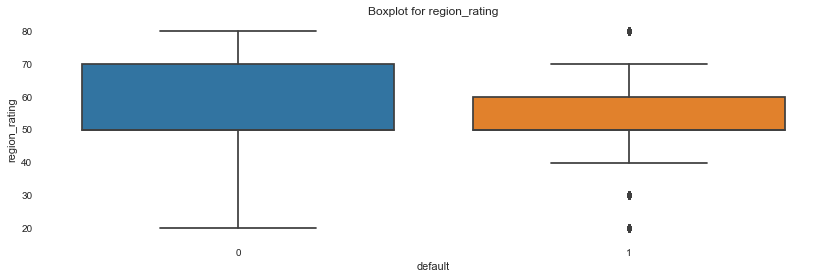

In [20]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=col, data=data[data['sample']==1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
for col in num_cols:
    boxplot(col)

- Молодые более склонны к совершению дефолта
- Дефолт совершают люди, которые имеют более высокое значение скоринговой оценки
- Платежеспособные люди живут, как правило, в регионах с более высоким рейтингом
- У совершающих дефолт доход чуть ниже
- Количество запросов в БКИ, обычно, выше у совершающих дефолт

## Категориальные признаки

### Рассмотри признак "Образование"

Missing education values:
 478


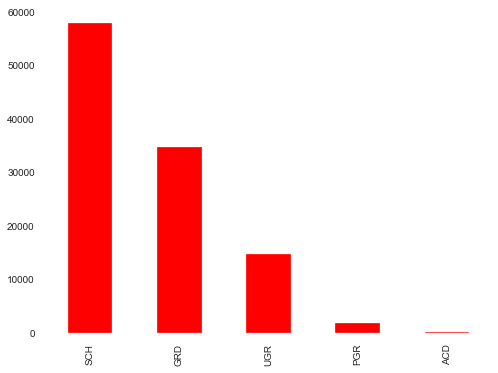

In [21]:
data.education.value_counts().plot(kind="bar",figsize=(8,6),color="r")
print("Missing education values:\n",data.education.isna().sum())

In [22]:
data.education = data.education.fillna("SCH") # заменим пустые значения на самое популярное

Смотрим зависимость дохода от уровня образования

<AxesSubplot:xlabel='education', ylabel='income'>

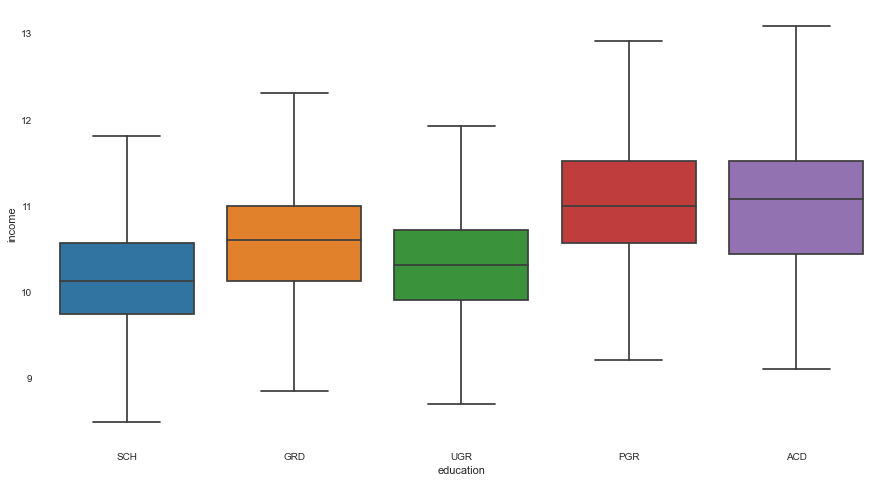

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="income", data=data, showfliers=False)

Люди с более высоким образованием имеют, как правило, более высокий доход

## Построим корреляционную матрицу

<AxesSubplot:>

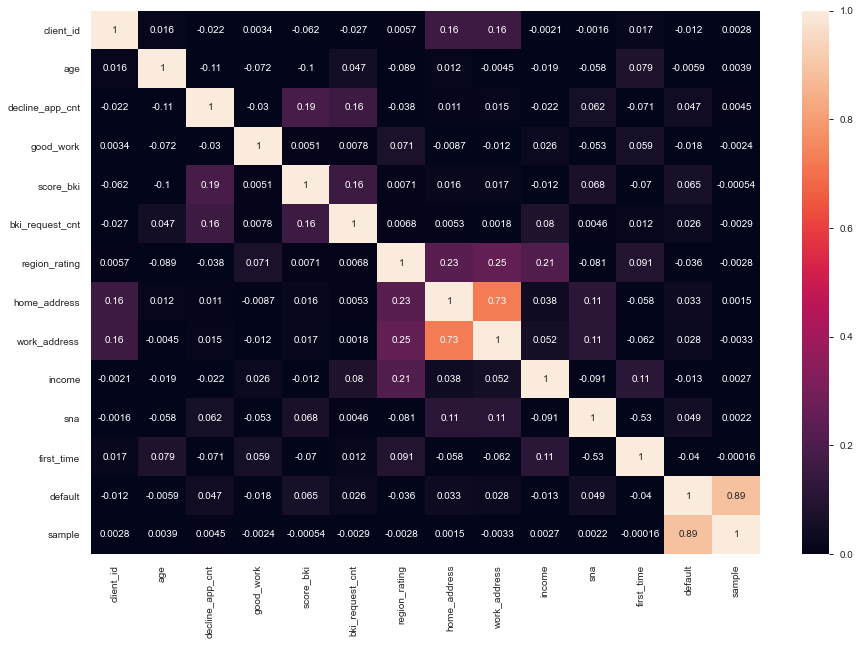

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(), vmin=0, vmax=1, annot = True)

- Признаки "домашний" и "рабочий" адресы имеют высокую зависимость - большинство выбирает работу рядом с домом
- Нет признаков, сильно коррелирующих с целевой переменной

# Feature engineering

**Сколько дней прошло с 1-го запроса**

In [24]:
data['app_date'] = pd.to_datetime(data.app_date)
data['app_date'] = data['app_date'].apply(lambda x: (x - data['app_date'].min()).days)

In [25]:
# копируем датафрейм
df = data.copy()

**Дом далеко от работы**

Предположим, если адрес работы и адрес дома не равны по числовому значению признака - значит человеку приходится долго добираться до работы

In [26]:
df['home_work'] = 0
for i in range(len(df)):
    if df['home_address'][i] == df['work_address'][i]:
        df['home_work'][i] = 0
    else:
        df['home_work'][i] = 1

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Количество отказных заявок/Количество запросов**

In [27]:
df['bki/decline'] = 0
for i in range(len(df)):
    if df['bki_request_cnt'][i] != 0 and df['decline_app_cnt'][i] != 0:
        df['bki/decline'][i] = df['decline_app_cnt'][i]/df['bki_request_cnt'][i]
    else:
        df['bki/decline'][i] = 0

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Категории возрастов+

In [28]:
df['age_category'] = ''

for i in range(len(df)):
    if df['age'][i] <=24:
        df['age_category'][i] = '18-24'
    elif 25 <= df['age'][i] <= 34:
        df['age_category'][i] = '25-34'
    elif 35 <= df['age'][i] <= 44:
        df['age_category'][i] = '35-44'
    elif 45 <= df['age'][i] <= 54:
        df['age_category'][i] = '45-54'
    elif 55 <= df['age'][i] <= 64:
        df['age_category'][i] = '55-64'
    elif df['age'][i] >= 65:
        df['age_category'][i] = '65+'

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShe

**Доход больше среднего по категории возраста+**

In [29]:
mean_income = df.groupby('age_category')['income'].mean().to_dict()
df['mean_income_age_cat'] = df['age_category'].map(mean_income)

In [30]:
df['inc_large_mean'] = 0

for i in range(len(df)):
    if df['income'][i] > df['mean_income_age_cat'][i]:
        df['inc_large_mean'][i] = 1

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Средний доход по возрасту -**

In [31]:
# mean_income = df.groupby('age')['income'].mean().to_dict()
# df['mean_income_age'] = df['age'].map(mean_income)

**Максимальный доход по возрасту -**

In [32]:
# max_income = df.groupby('age')['income'].max().to_dict()
# df['max_income_age'] = df['age'].map(max_income)

**Нормализованный доход по возрасту -**

In [33]:
# только положительные значения
# df["normalized_income"] = abs((df.income - df.mean_income_age)/df.max_income_age)

**Нормализованный доход по категории возраста**

In [34]:
df["normalized_income_minus_mean"] = (df.income - df.mean_income_age_cat)

In [35]:
# уберем отрицательные значения
df["normalized_income_minus_mean"] = df["normalized_income_minus_mean"] + abs(min(df["normalized_income_minus_mean"]))

**Cреднее количество обращений в БКИ по возрасту -**

In [36]:
# mean_bki = df.groupby('age')['bki_request_cnt'].mean().to_dict()
# df['mean_requests_age'] = df['age'].map(mean_bki)

**Больше среднего обращений в БКИ по категории возраста**

In [37]:
mean_bki = df.groupby('age_category')['bki_request_cnt'].mean().to_dict()
df['mean_requests_age'] = df['age_category'].map(mean_bki)

In [38]:
df['request_large_mean'] = 0

for i in range(len(df)):
    if df['bki_request_cnt'][i] > df['mean_requests_age'][i]:
        df['request_large_mean'][i] = 1

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Среднее количество обращений в БКИ по доходу -**

In [39]:
# mean_bki_inc = df.groupby('income')['bki_request_cnt'].mean().to_dict()
# df['mean_requests_income'] = df['income'].map(mean_bki_inc)

**Средний доход по региону -**

In [40]:
# mean_income_rat = df.groupby('region_rating')['income'].mean().to_dict()
# df['mean_income_region'] = df['region_rating'].map(mean_income_rat)

**Доход больше среднего по региону+**

In [41]:
mean_income_rat = df.groupby('region_rating')['income'].mean().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_income_rat)

In [42]:
df['inc_large_mean_region'] = 0

for i in range(len(df)):
    if df['income'][i] > df['mean_income_region'][i]:
        df['inc_large_mean_region'][i] = 1

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Без отказов от банков, но имеет обращения в БКИ

In [43]:
df['active_no_decline'] = 0

In [44]:
df.loc[(df['decline_app_cnt'] == 0) & (df['bki_request_cnt'] != 0), 'active_no_decline'] = 1

**Не имеет запросов в БКИ и не имеет отказов**

In [45]:
df['no_decline_request'] = 0

In [46]:
df.loc[(df['decline_app_cnt'] == 0) & (df['bki_request_cnt'] == 0), 'no_decline_request'] = 1

**Имеет доход выше среднего, но не имеет пометку "хорошая" работа (бизнес?)**

In [47]:
df['no_good_job_and_good_income'] = 0

In [48]:
df.loc[(df['good_work'] == 0) & (df['income'] > np.mean(df['income'])), 'no_good_job_and_good_income'] = 1

**Доход/Скоринг оценку**

In [49]:
df['income_per_score_bki'] = df['income'] / abs(df['score_bki'])

In [50]:
# df.to_csv('saves/df_fe.csv', index=False)

In [51]:
# df = pd.read_csv('saves/df_fe.csv')

## Кодирование бинарных и категориальных признаков признаков

In [52]:
# перекодируем текстовые значения в бинарных признаках на числовые
mapp = {}
label_encoder = LabelEncoder()
for col in bin_cols:
    # перекодировка
    df[col] = label_encoder.fit_transform(df[col])
    # сохраняем значения перекодировки в словаре
    mapp[col] = dict(enumerate(label_encoder.classes_))

In [53]:
cat_cols = ['education','work_address','home_address','sna','first_time', 'age_category'] 

In [54]:
# закодируем категориальные признаки
# df = pd.get_dummies(data=df, columns=cat_cols)
# перекодируем текстовые значения в бинарных признаках на числовые
mappс = {}
label_encoder = LabelEncoder()
for col in cat_cols:
    # перекодировка
    df[col] = label_encoder.fit_transform(df[col])
    # сохраняем значения перекодировки в словаре
    mapp[col] = dict(enumerate(label_encoder.classes_))

In [55]:
# Словарь категориальных и бинарных признаков
print(mapp)
print(mappс)

{'sex': {0: 'F', 1: 'M'}, 'car': {0: 'N', 1: 'Y'}, 'car_type': {0: 'N', 1: 'Y'}, 'good_work': {0: 0, 1: 1}, 'foreign_passport': {0: 'N', 1: 'Y'}, 'education': {0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}, 'work_address': {0: 1, 1: 2, 2: 3}, 'home_address': {0: 1, 1: 2, 2: 3}, 'sna': {0: 1, 1: 2, 2: 3, 3: 4}, 'first_time': {0: 1, 1: 2, 2: 3, 3: 4}, 'age_category': {0: '18-24', 1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65+'}}
{}


In [56]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'sample', 'home_work',
       'bki/decline', 'age_category', 'mean_income_age_cat', 'inc_large_mean',
       'normalized_income_minus_mean', 'mean_requests_age',
       'request_large_mean', 'mean_income_region', 'inc_large_mean_region',
       'active_no_decline', 'no_decline_request',
       'no_good_job_and_good_income', 'income_per_score_bki'],
      dtype='object')

In [57]:
# обновляем списки признаков по типу
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','app_date', 'region_rating',
            'bki/decline', 'normalized_income_minus_mean',
           'income_per_score_bki'] # numerical
cat_cols = ['education','work_address','home_address','sna','first_time', 'age_category'] # categorical
bin_cols = ['sex','car','car_type','good_work','foreign_passport','home_work', 'inc_large_mean',
           'request_large_mean', 'inc_large_mean_region', 'active_no_decline', 'no_decline_request',
           'no_good_job_and_good_income', ] # binary

## Обработка выбросов

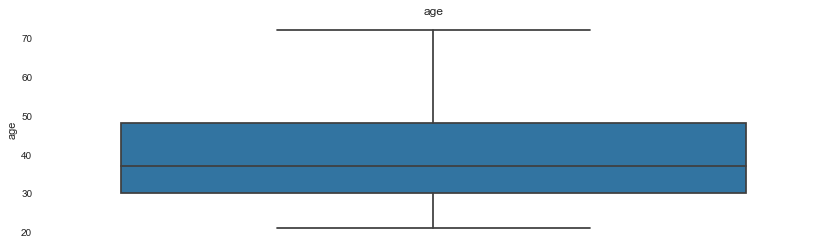

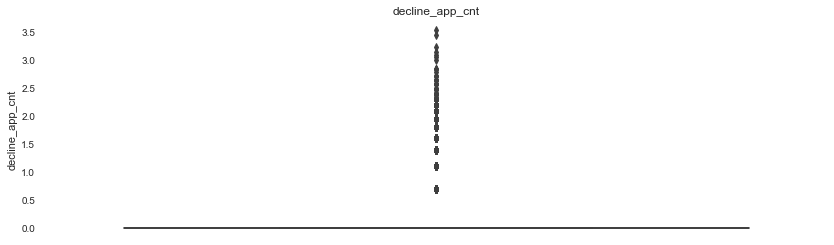

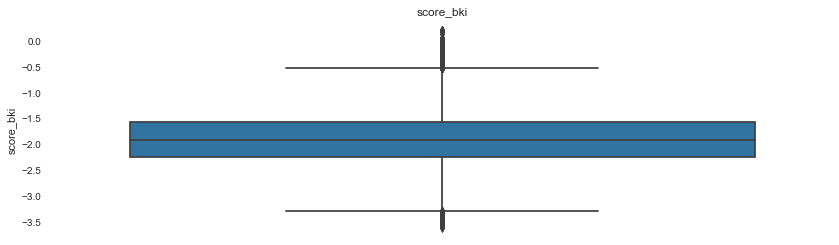

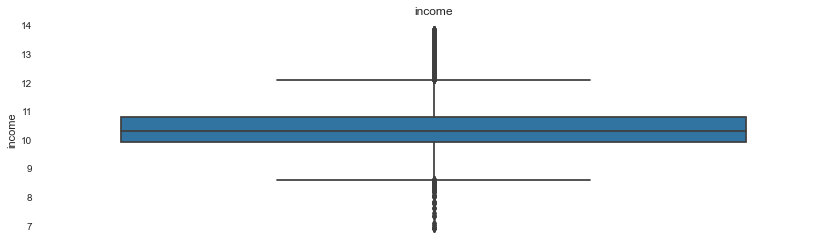

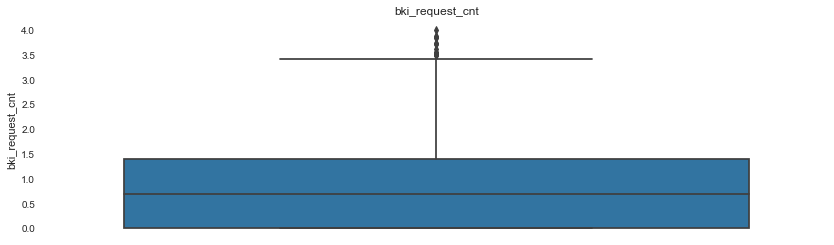

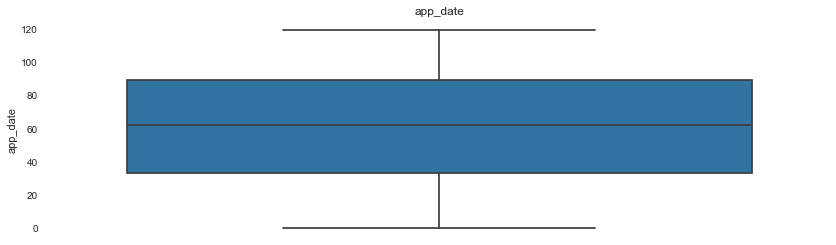

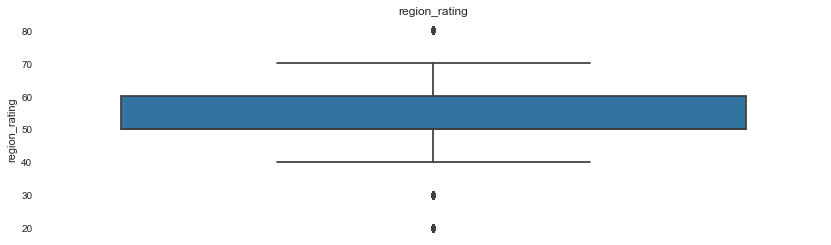

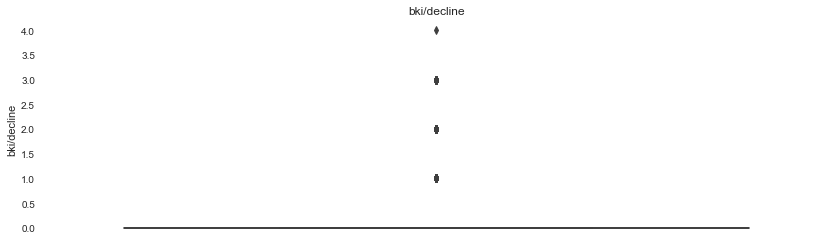

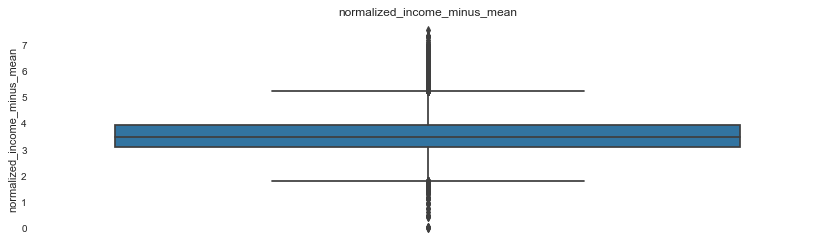

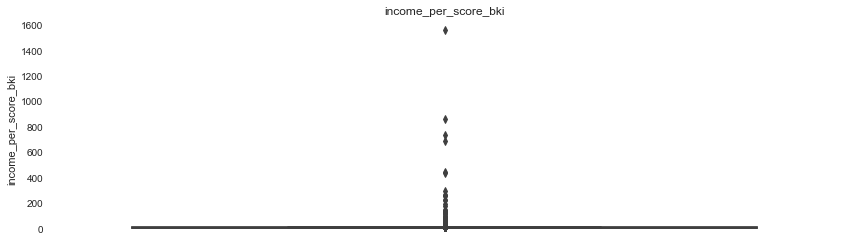

In [58]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(y=col, data=df,ax=axes)
    axes.set_title(col)
    plt.show()
for col in num_cols:
    boxplot(col)

In [59]:
# for col in num_cols:
#     median = df[col].median()
#     IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
#     perc25 = df[col].quantile(0.25)
#     perc75 = df[col].quantile(0.75)
#     print("Columns: ", col)
#     print('25%: {},'.format(perc25), '75%: {},'.format(perc75), 
#           "IQR: {}, ".format(IQR),"Borderline: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [60]:
# df1 = df.copy()
# dataset = df.copy()

In [61]:
df['score_bki'] = abs(df['score_bki'])

In [62]:
# логарифмируем числовые признаки
for i in num_cols:
     df[i] = np.log(df[i])
     df[i].replace([np.inf, -np.inf], 0, inplace=True)

/Users/rus/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
# dataset[num_cols] = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns = df[num_cols].columns)

In [64]:
# df.to_csv('saves/df_dum_and_log.csv', index=False)

In [142]:
# df = pd.read_csv('saves/df_dum_and_log.csv')

## F-test

оцениваю зависимость признаков и целевой переменной

### Числовые признаки

In [65]:
# тренировочная выборка
data_temp = df.loc[df['sample'] == 1] 

<AxesSubplot:>

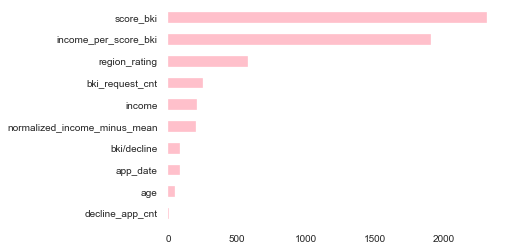

In [66]:
imp_num = pd.Series(f_classif(data_temp[num_cols], data_temp['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', color='pink')

### Категориальные и бинарные признаки

In [67]:
data_temp.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'sample', 'home_work',
       'bki/decline', 'age_category', 'mean_income_age_cat', 'inc_large_mean',
       'normalized_income_minus_mean', 'mean_requests_age',
       'request_large_mean', 'mean_income_region', 'inc_large_mean_region',
       'active_no_decline', 'no_decline_request',
       'no_good_job_and_good_income', 'income_per_score_bki'],
      dtype='object')

<AxesSubplot:>

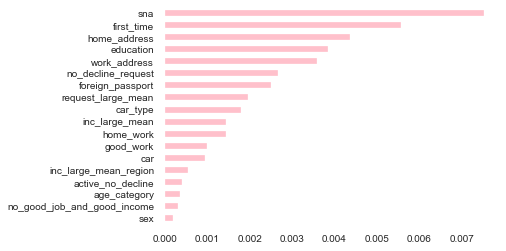

In [68]:
imp_cat = pd.Series(mutual_info_classif(data_temp[bin_cols+cat_cols], data_temp['default'],
                                     discrete_features =True), index = bin_cols+cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', color='pink')

## Собираю готовый dataframe

In [69]:
df = pd.get_dummies(df, prefix=cat_cols, columns=cat_cols) # dummy-переменные

# Обучим модель

In [70]:
# разделяю на тренировочную и тестовую выборки
train_df = df.query('sample == 1').drop(['sample','client_id'], axis=1)
test_df = df.query('sample == 0').drop(['sample','client_id'], axis=1)

In [71]:
train_df.columns

Index(['app_date', 'sex', 'age', 'car', 'car_type', 'decline_app_cnt',
       'good_work', 'score_bki', 'bki_request_cnt', 'region_rating', 'income',
       'foreign_passport', 'default', 'home_work', 'bki/decline',
       'mean_income_age_cat', 'inc_large_mean', 'normalized_income_minus_mean',
       'mean_requests_age', 'request_large_mean', 'mean_income_region',
       'inc_large_mean_region', 'active_no_decline', 'no_decline_request',
       'no_good_job_and_good_income', 'income_per_score_bki', 'education_0',
       'education_1', 'education_2', 'education_3', 'education_4',
       'work_address_0', 'work_address_1', 'work_address_2', 'home_address_0',
       'home_address_1', 'home_address_2', 'sna_0', 'sna_1', 'sna_2', 'sna_3',
       'first_time_0', 'first_time_1', 'first_time_2', 'first_time_3',
       'age_category_0', 'age_category_1', 'age_category_2', 'age_category_3',
       'age_category_4', 'age_category_5'],
      dtype='object')

In [72]:
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values # целевой признак

In [89]:
train_df['default'].value_counts()

0    64427
1     9372
Name: default, dtype: int64

In [73]:
# разделяю выборку на тренировочную и валидационную
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED)

In [74]:
lr = LogisticRegression(max_iter = 1000)

In [75]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

## ROC AUC

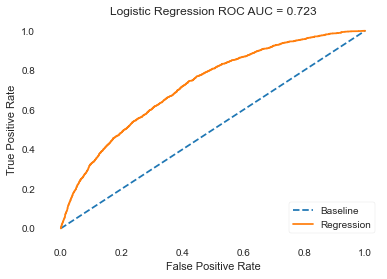

In [76]:
probs = lr.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [90]:
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

precision_score: 0.4057971014492754
recall_score: 0.030026809651474532
f1_score: 0.05591612581128308


Модель имеет низкие показатели

### Confusion matrix

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

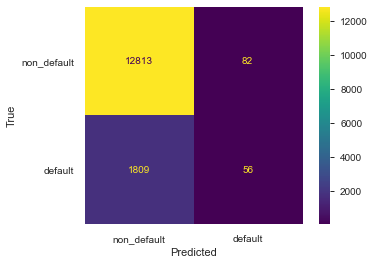

In [84]:
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

Модель предсказывает, что практически все не дефолтные

## Разделим данные

In [95]:
data = df.copy()

In [96]:
train_data = data.query('sample == 1').drop(['sample','client_id'], axis=1)
test_data = data.query('sample == 0').drop(['sample','client_id'], axis=1)

X_train = train_data.drop(['default'], axis=1)
y_train = train_data.default.values
X_test = test_data.drop(['default'], axis=1)

In [97]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

## Протестируем алгоритмы

#### SVC

Всех обозначил не дефолтными

In [98]:
from sklearn.svm import SVC

In [99]:
model = SVC(random_state=RANDOM_SEED)

In [100]:
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

In [101]:
print('precision_score:',precision_score(y_test_1,y_pred_1))
print('recall_score:',recall_score(y_test_1,y_pred_1))
print('f1_score:',f1_score(y_test_1,y_pred_1))

precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


/Users/rus/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

#### KNeighborsClassifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
model = KNeighborsClassifier()

In [106]:
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

In [107]:
print('precision_score:',precision_score(y_test_1,y_pred_1))
print('recall_score:',recall_score(y_test_1,y_pred_1))
print('f1_score:',f1_score(y_test_1,y_pred_1))

precision_score: 0.27176220806794055
recall_score: 0.06863270777479893
f1_score: 0.10958904109589042


#### MLPClassifier

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
model = MLPClassifier(random_state=RANDOM_SEED)

In [110]:
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [111]:
print('precision_score:',precision_score(y_test_1,y_pred_1))
print('recall_score:',recall_score(y_test_1,y_pred_1))
print('f1_score:',f1_score(y_test_1,y_pred_1))

precision_score: 0.32840236686390534
recall_score: 0.05951742627345844
f1_score: 0.10077167498865182


#### XGBClassifier

In [112]:
from xgboost import XGBClassifier

In [113]:
model = XGBClassifier(random_state=RANDOM_SEED)

In [114]:
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

/Users/rus/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:31:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
print('precision_score:',precision_score(y_test_1,y_pred_1))
print('recall_score:',recall_score(y_test_1,y_pred_1))
print('f1_score:',f1_score(y_test_1,y_pred_1))

precision_score: 0.3561643835616438
recall_score: 0.0418230563002681
f1_score: 0.07485604606525913


## Подберем параметры

In [128]:
from sklearn.model_selection import StratifiedKFold

In [131]:
import pickle

### XGBClassifier

In [212]:
# параметры для перебора
params = {
        'learning_rate' : [0.05, 0.1, 0.2,],
        'n_estimators' : [150, 200, 250],
        'min_child_weight': [4, 5, 6],
        'gamma': [0.3, 0.5, 0.8],
        'subsample': [0.9, 1.0, 1.2],
        'colsample_bytree': [0.5, 0.6, 0.7],
        'max_depth': [4, 5, 6]
        }

In [213]:
model = XGBClassifier(objective='binary:logistic', silent=True, nthread=1)

In [214]:
# разбиение выборки для проверки
folds = 3
param_comb = 7

# перекрестная валидация
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

# рандомизированный поиск по гиперпараметрам
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=RANDOM_SEED )

# обучаю модель по лучшим подобранным гиперпараметрам
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


/Users/rus/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.71715166 0.73459996        nan 0.73359404        nan 0.73336206
 0.73305414]
  category=UserWarning
/Users/rus/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f9623058cd0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                        

In [ ]:
pkl_filename = "xgb_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model, file) 

Sub_result: 0.74268

### KNeighborsClassifier

In [125]:
model = KNeighborsClassifier()

In [126]:
# параметры для перебора
params = {    
        'n_neighbors': list(range(2, 11, 2)),
        'leaf_size': list(range(20, 41, 3)),
        'p': [1,2],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'chebyshev'],
        }

In [129]:
# разбиение выборки для проверки
folds = 3
param_comb = 5

# перекрестная валидация
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

# рандомизированный поиск по гиперпараметрам
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=RANDOM_SEED )

# обучаю модель по лучшим подобранным гиперпараметрам
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7ff787de8550>,
                   estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [20, 23, 26, 29, 32, 35,
                                                      38],
                                        'metric': ['minkowski', 'chebyshev'],
                                        'n_neighbors': [2, 4, 6, 8, 10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=11, scoring='roc_auc', verbose=3)

In [133]:
pkl_filename = "knn_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model, file) 

Sub_result: 0.62991

### MLPClassifier

In [139]:
model = MLPClassifier(random_state=RANDOM_SEED)

In [140]:
# параметры для перебора
params = {    
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
        }

In [141]:
# разбиение выборки для проверки
folds = 3
param_comb = 5

# перекрестная валидация
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

# рандомизированный поиск по гиперпараметрам
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=RANDOM_SEED )

# обучаю модель по лучшим подобранным гиперпараметрам
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7ff78af746d0>,
                   estimator=MLPClassifier(random_state=11), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=11, scoring='roc_auc', verbose=3)

In [143]:
pkl_filename = "mlp_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model, file) 

Sub_result: 0.73829

# Предсказываем целевой признак для тестовой выборки

In [144]:
test_data = X_test
y_pred = random_search.predict_proba(test_data)
results_df = pd.DataFrame(data={'client_id':test['client_id'], 'default':y_pred[:,1]})

In [145]:
# test_data = X_test
# y_pred = random_search.predict_proba(test_data)
# results_df = pd.DataFrame(data={'client_id':test['client_id'], 'default':y_pred[:,1]})

In [146]:
results_df

,client_id,default
0,74835,0.040179
1,17527,0.257009
2,75683,0.070502
3,26883,0.087950
4,28862,0.020248
...,...,...
36344,83775,0.329229
36345,106254,0.020574
36346,81852,0.306901
36347,1971,0.297898


### Формирую csv-файл с предсказанными вероятностями

In [147]:
results_df.to_csv('submission_mlp.csv', index=False)

best result: 0.74268 (XGB)